In [2]:
import requests 
import json
import pandas as pd 
from pandas import DataFrame
import geopandas as gpd
from matplotlib import artist
import matplotlib.pyplot as plt
import contextily as ctx
from pandas import DataFrame
import ast
import shapely
import io
import folium
import matplotlib 
import mapclassify
from datetime import datetime,date,time

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates


In [3]:
def plot_patrol_timeline(labels, dates, title, colors):
    plt.ioff()
    fig, ax = plt.subplots(figsize=(20, 4), constrained_layout=True)
    _ = ax.set_ylim(-2, 1.75)
    #_ = ax.set_xlim(min_date, max_date)
    _ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
    _ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
    _ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)

    label_offsets = np.zeros(len(dates))
    label_offsets[::2] = 0.35
    #label_offsets[1::2] = -0.7
    label_offsets[1::2] = -0.85
    for i, (l, d, c) in enumerate(zip(labels, dates, colors)):
        _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color=c,fontsize=12)

    stems = np.zeros(len(dates))
    stems[::2] = 0.3
    stems[1::2] = -0.3   
    markerline, stemline, baseline = ax.stem(dates, stems, ) #use_line_collection=True)
    _ = plt.setp(markerline, marker=',', color='darkmagenta')
    _ = plt.setp(stemline, color='darkmagenta')

    # hide lines around chart
    for spine in ["left", "top", "right", "bottom"]:
        _ = ax.spines[spine].set_visible(False)
     
    # hide tick labels
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
     
    _ = ax.set_title(title, fontweight="bold", fontfamily='serif', fontsize=16, 
                     color='royalblue')

    return fig

In [111]:
# Good Patrols
names = ["NewPatrol", "Waypoint", "Waypoint","Observation", "Waypoint", #"Observation", 
         "Waypoint", "Waypoint","PausePatrol","ResumePatrol", "Waypoint", "Waypoint",
        "ChangePatrol", "Waypoint", "Waypoint","EndPatrol"]
timestamps = ["2024-02-24 09:00", "2024-02-24 09:05", "2024-02-24 09:10", "2024-02-24 09:12", "2024-02-24 09:15", #"2024-02-24 09:16", 
           "2024-02-24 09:20", "2024-02-24 09:25", "2024-02-24 09:26", "2024-02-24 09:36", "2024-02-24 09:40", "2024-02-24 09:45", 
           "2024-02-24 09:49", "2024-02-24 09:50", "2024-02-24 09:55", "2024-02-24 10:00"]
obscount = [1,None,None,2,None,3,None,4,5,None,None,6,None,None,7]
colors = ["green","green","green","green","green","green","green","green","green","green","green","green","green","green","green","green","green"]
filename = 'G:/My Drive/Smart/Documents/patrol-timeline.png'
title = 'Timeline of a typical Patrol'


In [71]:
# Missing Observations
names = ["NewPatrol", "Waypoint", "Waypoint", #"Observation", 
         "Waypoint", #"Observation", 
         "Waypoint", "Waypoint","PausePatrol","ResumePatrol", "Waypoint", "Waypoint",
        "ChangePatrol", "Waypoint", "Waypoint","EndPatrol"]
timestamps = ["2024-02-24 09:00", "2024-02-24 09:05", "2024-02-24 09:10", #"2024-02-24 09:12", 
              "2024-02-24 09:15", #"2024-02-24 09:16", 
           "2024-02-24 09:20", "2024-02-24 09:25", "2024-02-24 09:26", "2024-02-24 09:36", "2024-02-24 09:40", "2024-02-24 09:45", 
           "2024-02-24 09:49", "2024-02-24 09:50", "2024-02-24 09:55", "2024-02-24 10:00"]
obscount = [1,None,None, #2,
            None,None,None,4,5,None,None,6,None,None,7]
colors = ["green","green","green","green","green","green","red","red","green","green","red","green","green","red","green","green","green"]
filename = 'G:/My Drive/Smart/Documents/patrol-timeline-missing-observation.png'
title = 'Missing Observation'

In [55]:
# Waypoints outside Patrol timeframe
names = ["NewPatrol", "Waypoint", "Waypoint","Observation", "Waypoint", #"Observation", 
         "Waypoint", "Waypoint","PausePatrol","ResumePatrol", "Waypoint", "Waypoint",
        "ChangePatrol", "Waypoint", "Waypoint","EndPatrol", "Waypoint", "Waypoint"]
timestamps = ["2024-02-24 09:00", "2024-02-24 09:05", "2024-02-24 09:10", "2024-02-24 09:12", "2024-02-24 09:15", #"2024-02-24 09:16", 
           "2024-02-24 09:20", "2024-02-24 09:25", "2024-02-24 09:26", "2024-02-24 09:36", "2024-02-24 09:40", "2024-02-24 09:45", 
           "2024-02-24 09:49", "2024-02-24 09:50", "2024-02-24 09:55", "2024-02-24 10:00", "2024-02-24 10:05", "2024-02-24 10:10"]
obscount = [1,None,None,2,None,None,None,3,4,None,None,5,None,None,7,None,None]
colors = ["green","green","green","green","green","green","green","green","green","green","green","green","green","green","green","red","red"]
filename = 'G:/My Drive/Smart/Documents/patrol-timeline-outside.png'
title = 'Waypoint Outside Patrol Timeframe'


In [103]:
# Overlapping
names = ["NewPatrol-1", "Waypoint-1", "Waypoint-1","Observation-1", "Waypoint-1", #"Observation", 
         "Waypoint-1", "Waypoint-1","PausePatrol-1","ResumePatrol-1", "Waypoint-1", "Waypoint-1",
        "NewPatrol-2", "Waypoint-?", "Waypoint-?","EndPatrol-1", "Waypoint-2","EndPatrol-2"]
timestamps = ["2024-02-24 09:00", "2024-02-24 09:05", "2024-02-24 09:10", "2024-02-24 09:12", "2024-02-24 09:15", #"2024-02-24 09:16", 
           "2024-02-24 09:20", "2024-02-24 09:25", "2024-02-24 09:26", "2024-02-24 09:36", "2024-02-24 09:40", "2024-02-24 09:45", 
           "2024-02-24 09:49", "2024-02-24 09:50", "2024-02-24 09:55", "2024-02-24 10:00", "2024-02-24 10:05", "2024-02-24 10:10"]
obscount = [1,None,None,2,None,3,None,4,5,None,None,1,None,None,6, None,2]
colors = ["green","green","green","green","green","green","green","green","green","green","green","orange","orange","orange","green","green","green"]
filename = 'G:/My Drive/Smart/Documents/patrol-overlapping.png'
title = ''


In [112]:
# Format datetimes
dates = [datetime.strptime(d, "%Y-%m-%d %H:%M") for d in timestamps]

In [113]:
df = pd.DataFrame([dates, names, obscount,colors])
df

0                    1                    2   \
0  2024-02-24 09:00:00  2024-02-24 09:05:00  2024-02-24 09:10:00   
1            NewPatrol             Waypoint             Waypoint   
2                    1                 None                 None   
3                green                green                green   

                    3                    4                    5   \
0  2024-02-24 09:12:00  2024-02-24 09:15:00  2024-02-24 09:20:00   
1          Observation             Waypoint             Waypoint   
2                    2                 None                    3   
3                green                green                green   

                    6                    7                    8   \
0  2024-02-24 09:25:00  2024-02-24 09:26:00  2024-02-24 09:36:00   
1             Waypoint          PausePatrol         ResumePatrol   
2                 None                    4                    5   
3                green                green                green   

                    9                    10                   11  \
0  2024-02-24 09:40:00  2024-02-24 09:45:00  2024-02-24 09:49:00   
1             Waypoint             Waypoint         ChangePatrol   
2                 None                 None                    6   
3                green                green                green   

                    12                   13                   14     15     16  
0  2024-02-24 09:50:00  2024-02-24 09:55:00  2024-02-24 10:00:00   None   None  
1             Waypoint             Waypoint            EndPatrol   None   None  
2                 None                 None                    7   None   None  
3                green                green                green  green  green

In [114]:
# Format labels
min_date = time(np.min(dates).hour, np.min(dates).minute, 0)
max_date = time(np.max(dates).hour, np.max(dates).minute, 0)
 
# labels with associated dates
labels = ['{0:%H %M}:\n{2}-{1}'.format(d, l, o) for l, d, o in zip (names, dates,obscount)]
labels = []
for l, d, o in zip (names, dates,obscount):
    if o != None:
        label = '{0:%H %M}:\n{1}\nObsCount: {2}'.format(d, l, o)
    else:
        label = '{0:%H %M}:\n{1}'.format(d, l)
    labels.append(label)

In [115]:
fig = plot_patrol_timeline(labels, dates, title, colors)

In [116]:
plt.savefig(filename)

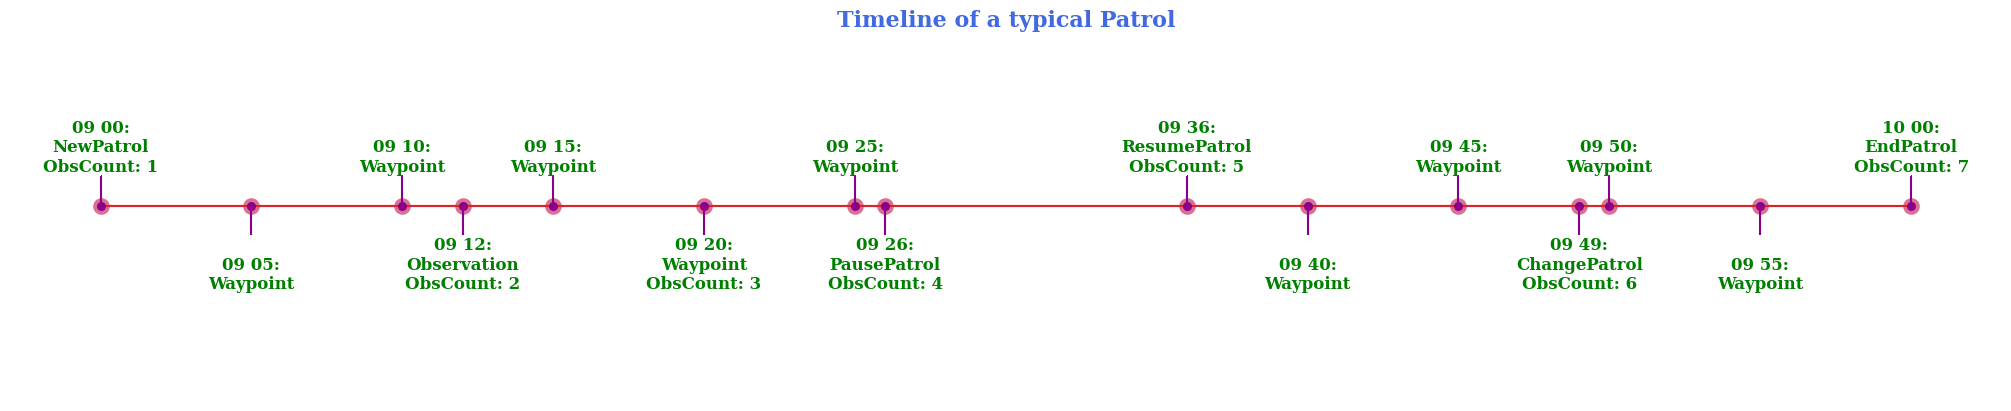

In [117]:
fig

In [110]:
plt.close()
fig.clear(True)